In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread("images/lenna.png")

In [3]:
kernel = np.ones([3,3], dtype=np.float32)

In [4]:
kernel

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [5]:
x = np.array([[3,2,5],[6,4,3],[2,4,4]])

In [7]:
x.mean()

3.6666666666666665

In [11]:
(x * kernel).flatten().sum()

33.0

In [12]:
(x * kernel/9).flatten().sum()

3.666666666666667

In [13]:
kernel = np.ones([3,3], dtype=np.float32) / 9
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

In [14]:
(x * kernel).flatten().sum()

3.666666693985462

In [15]:
help(cv2.filter2D)

Help on built-in function filter2D:

filter2D(...)
    filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
    .   @brief Convolves an image with the kernel.
    .   
    .   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
    .   the aperture is partially outside the image, the function interpolates outlier pixel values
    .   according to the specified border mode.
    .   
    .   The function does actually compute correlation, not the convolution:
    .   
    .   \f[\texttt{dst} (x,y) =  \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}}  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
    .   
    .   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
    .   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
    .   anchor.y - 1)`.
    

In [17]:
img_avg = cv2.filter2D(img, -1, kernel)

In [19]:
cv2.imshow("Original Image", img)
cv2.imshow("Blurred Image", img_avg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
kernel = np.ones([7,7], dtype=np.float32) / 49
kernel

array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816]], dtype=float32)

In [24]:
img_avg = cv2.filter2D(img, -1, kernel)

In [25]:
cv2.imshow("Blurred Image", img_avg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
img_gray = cv2.imread("images/lenna.png", 0)

In [27]:
img_avg1 = cv2.filter2D(img_gray, -1, kernel)

In [28]:
cv2.imshow("Blurred Gary Image", img_avg1)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Gaussian Filter

In [30]:
import seaborn as sns

In [31]:
iq = np.array([80,85,85,90,90,90,95,95,95,95,100,100,100,100,100,100,
              105,105,105,105,110,110,110,115,115,120])

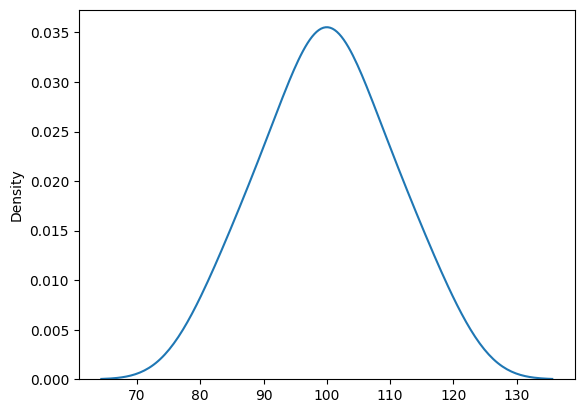

In [32]:
sns.kdeplot(iq);

In [36]:
y = np.array([1,2,3,4,5,4,3,2,1])

In [37]:
100 * y

array([100, 200, 300, 400, 500, 400, 300, 200, 100])

In [39]:
kernel_size = 7
sigma = 0.05 * ((kernel_size - 1) * 0.5 - 1) + 2.35

In [41]:
sigma

2.45

In [40]:
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)

In [42]:
gaussian_kernel

array([[0.09054696],
       [0.13732657],
       [0.17631244],
       [0.19162806],
       [0.17631244],
       [0.13732657],
       [0.09054696]])

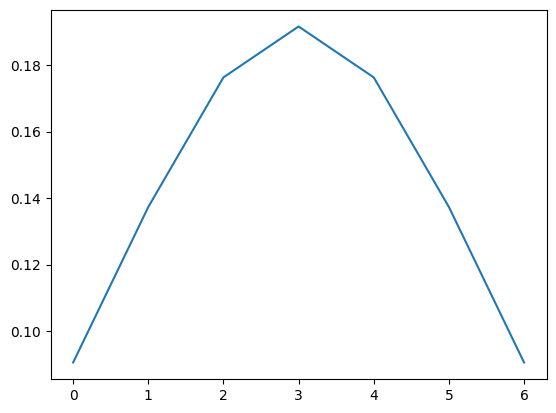

In [43]:
plt.plot(gaussian_kernel)

In [44]:
img_gau = cv2.filter2D(img, -1, gaussian_kernel)

In [46]:
img_comb = np.hstack([img, img_gau])

In [47]:
cv2.imshow("Blurred Gaussian Image", img_comb)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Median filter

In [53]:
x = np.array([5,1,3,8,7,6])

In [54]:
np.median(x)

5.5

In [55]:
img_med = cv2.medianBlur(img, 7)

In [56]:
cv2.imshow("Median Blurred Image", img_med)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
img_med = cv2.medianBlur(img_gray, 7)

In [58]:
cv2.imshow("Median Blurred Image", img_med)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [59]:
img_med3 = cv2.medianBlur(img_gray, 3)
img_med5 = cv2.medianBlur(img_gray, 5)
img_med7 = cv2.medianBlur(img_gray, 7)
img_med9 = cv2.medianBlur(img_gray, 9)
img_med11 = cv2.medianBlur(img_gray, 11)
img_med13 = cv2.medianBlur(img_gray, 13)
img_med15 = cv2.medianBlur(img_gray, 15)

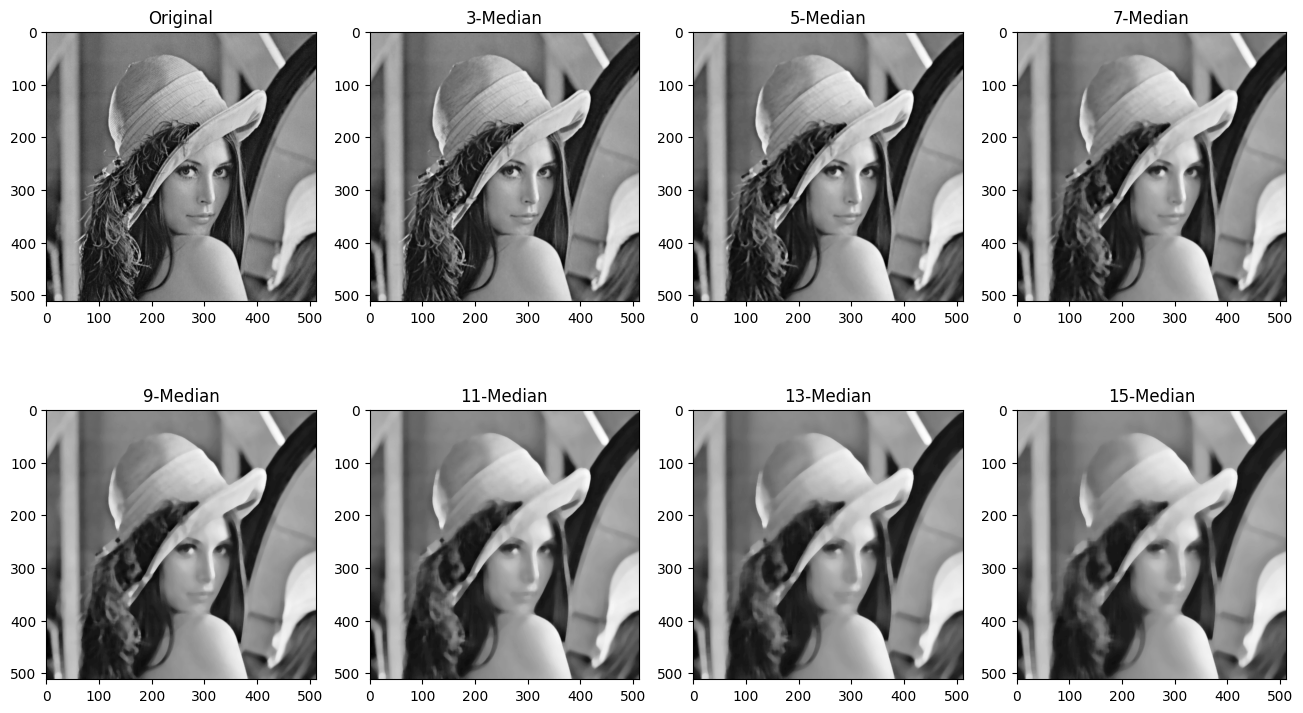

In [63]:
plt.figure(figsize=(16,9))
plt.subplot(2,4,1);  plt.title("Original");  plt.imshow(img_gray, cmap = 'gray')
plt.subplot(2,4,2);  plt.title("3-Median");  plt.imshow(img_med3, cmap = 'gray')
plt.subplot(2,4,3);  plt.title("5-Median");  plt.imshow(img_med5, cmap = 'gray')
plt.subplot(2,4,4);  plt.title("7-Median");  plt.imshow(img_med7, cmap = 'gray')
plt.subplot(2,4,5);  plt.title("9-Median");  plt.imshow(img_med9, cmap = 'gray')
plt.subplot(2,4,6);  plt.title("11-Median");  plt.imshow(img_med11, cmap = 'gray')
plt.subplot(2,4,7);  plt.title("13-Median");  plt.imshow(img_med13, cmap = 'gray')
plt.subplot(2,4,8);  plt.title("15-Median");  plt.imshow(img_med15, cmap = 'gray')

In [64]:
img_med = cv2.medianBlur(img_gray, 29)

In [65]:
cv2.imshow("Median Blurred Image", img_med)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Bilateral Filter

In [67]:
help(cv2.bilateralFilter)

Help on built-in function bilateralFilter:

bilateralFilter(...)
    bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
    .   @brief Applies the bilateral filter to an image.
    .   
    .   The function applies bilateral filtering to the input image, as described in
    .   http://www.dai.ed.ac.uk/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html
    .   bilateralFilter can reduce unwanted noise very well while keeping edges fairly sharp. However, it is
    .   very slow compared to most filters.
    .   
    .   _Sigma values_: For simplicity, you can set the 2 sigma values to be the same. If they are small (\<
    .   10), the filter will not have much effect, whereas if they are large (\> 150), they will have a very
    .   strong effect, making the image look "cartoonish".
    .   
    .   _Filter size_: Large filters (d \> 5) are very slow, so it is recommended to use d=5 for real-time
    .   applications, and perhaps d=9 for offline applicatio

In [71]:
img_bil = cv2.bilateralFilter(img, d=9, sigmaColor=95, sigmaSpace=75)  

In [72]:
img_ori_bil = np.hstack([img, img_bil])

In [73]:
cv2.imshow("Bilateral Blurred Image", img_ori_bil)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### All in one

In [75]:
avg_kernel = np.ones([9,9], dtype=np.float32) / 81
gaussian_kernel = cv2.getGaussianKernel(9, sigma)

In [78]:
img_avg = cv2.filter2D(img_gray, -1, avg_kernel)
img_bil = cv2.bilateralFilter(img_gray, d=9, sigmaColor=95, sigmaSpace=75) 
img_gau = cv2.filter2D(img_gray, -1, gaussian_kernel)
img_med = cv2.medianBlur(img_gray, 9)

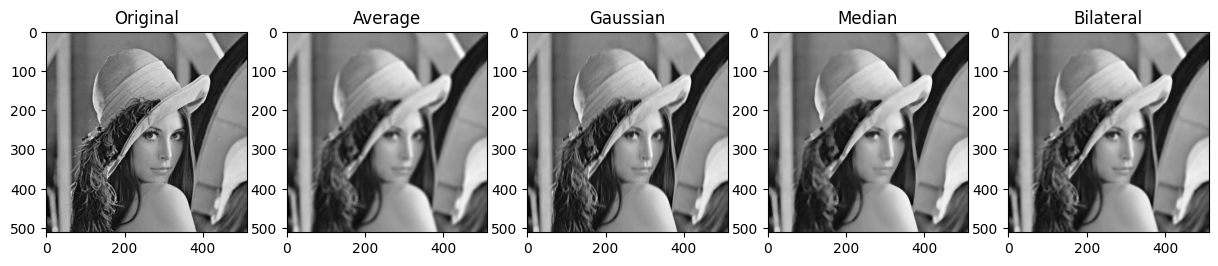

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(1,5,1);  plt.title("Original");  plt.imshow(img_gray, cmap = 'gray')
plt.subplot(1,5,2);  plt.title("Average");  plt.imshow(img_avg, cmap = 'gray')
plt.subplot(1,5,3);  plt.title("Gaussian");  plt.imshow(img_gau, cmap = 'gray')
plt.subplot(1,5,4);  plt.title("Median");  plt.imshow(img_med, cmap = 'gray')
plt.subplot(1,5,5);  plt.title("Bilateral");  plt.imshow(img_bil, cmap = 'gray')